## 讀取圖片
常見的套件:
1. skimage
2. PIL
3. OpenCV

# [教學目標]
- 示範其他的讀圖檔方式

# [範例重點]
- 用 skimage.io 讀取圖檔 (In[2], Out[2])
- 用 PIL.Image 讀取圖檔 (In[3], Out[3])
- 用 OpenCV 讀取圖檔 (In[4], Out[4])

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

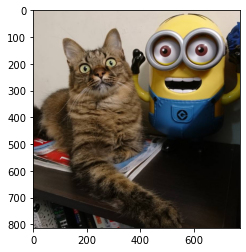

In [18]:
import skimage.io as skio
img1 = skio.imread('./examples/example.jpg')
plt.imshow(img1)
plt.show()

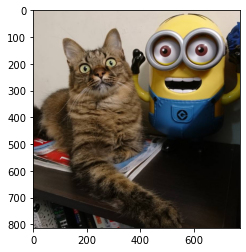

In [19]:
from PIL import Image
img2 = Image.open('./example.jpg') # 這時候還是 PIL object
img2 = np.array(img2)
plt.imshow(img2)
plt.show()

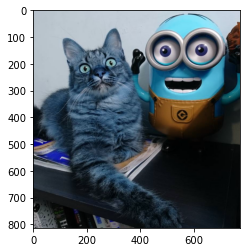

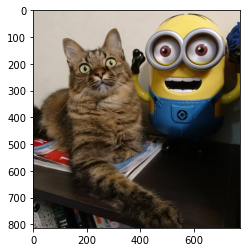

In [29]:
import cv2
img3 = cv2.imread('./example.jpg')
plt.imshow(img3)
plt.show()

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

### 比較三種開圖方式的時間 - 比較讀取 1000 次

In [ ]:
N_times = 1000

In [ ]:
%%timeit
im = np.array([skio.imread('./example.jpg') for _ in range(N_times)])

In [ ]:
%%timeit
im = np.array([np.array(Image.open('./example.jpg')) for _ in range(N_times)])

In [ ]:
%%timeit
im = np.array([cv2.cvtColor(cv2.imread('./example.jpg'), cv2.COLOR_BGR2RGB) for _ in range(N_times)])

## 將影像存成 mat

In [ ]:
import scipy.io as sio
sio.savemat(file_name='./example.jpg', mdict={'img': img1})

In [ ]:
mat_arr = sio.loadmat('./example.mat')
print(mat_arr.keys())

In [ ]:
mat_arr = mat_arr['img']
print(mat_arr.shape)

In [ ]:
plt.imshow(mat_arr)
plt.show()

# 練習時間

## 1-1 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

## 1-2 將所提供的 txt 轉成 pandas dataframe

## 2. 從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [26]:
# 引入 requests 模組
import requests

# 使用 GET 方式下載普通網頁
r = requests.get('https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt')

# 輸出網頁 HTML 原始碼"
print(r.text)

n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
n00015388_238	http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
n00015388_304	http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
n00015388_327	http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
n00015388_355	http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
n00015388_373	http://img172.imageshack.us/img172/4606/napo03072en9.jpg
n00015388_379	http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg
n00015388_388	http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg
n00015388_442	http://www.porschemania.it/discus/messages/815/102099.jpg
n00015388_474	http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg
n00015388_514	http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg
n00015388_671	http://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg
n00015388_686	http://farm1.static.flic

In [27]:
# pd.read_table() 預設 sep="\t"
import pandas as pd

txt_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"
txt_df = pd.read_table(txt_url)
txt_df.columns = ['no','url']
txt_df

,no,url
0,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
1,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
2,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
3,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
4,n00015388_373,http://img172.imageshack.us/img172/4606/napo03...
...,...,...
9989,n00433802_5197,http://grfx.cstv.com/photos/schools/afa/sports...
9990,n00433802_5202,http://farm2.static.flickr.com/1130/960179413_...
9991,n00433802_5204,http://static.flickr.com/150/387324732_f8149d0...
9992,n00433802_5208,http://3.bp.blogspot.com/_9T2cRtlgHV0/SK55RHay...


In [28]:
urls = txt_df.head().url
urls

0    http://farm2.static.flickr.com/1005/3352960681...
1    http://farm1.static.flickr.com/27/51009336_a96...
2    http://farm4.static.flickr.com/3025/2444687979...
3    http://img100.imageshack.us/img100/3253/forres...
4    http://img172.imageshack.us/img172/4606/napo03...
Name: url, dtype: object

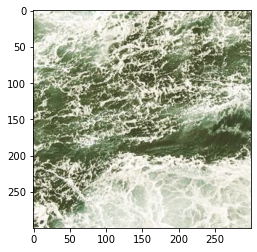

In [52]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import cv2


# To save to an absolute path.
for i in range(5):
    r = requests.get("https://picsum.photos/300/300?random="+str(i))  
    with open('./random'+str(i)+'.jpg', 'wb') as f:
        f.write(r.content)


img_path = './random'+str(0)+'.jpg'
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

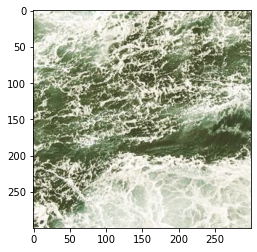

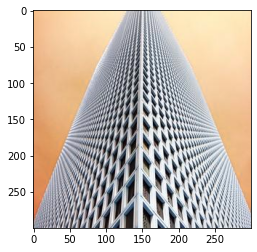

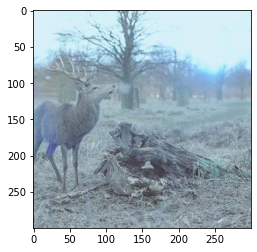

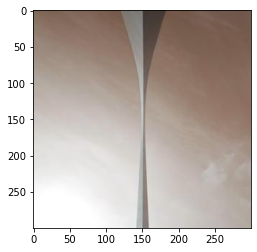

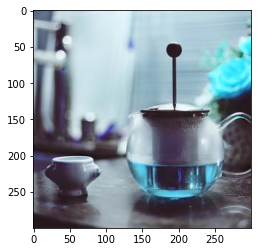

In [54]:
for i in range(5):
    img_path = './random'+str(i)+'.jpg'
    img = cv2.imread(img_path)
    plt.imshow(img)
    plt.show()